In [25]:
import os
import pandas as pd
import numpy as np

In [26]:
file_path = "AQI_dataset.csv"
data = pd.read_csv(file_path, low_memory = False)
sorted_data = data.sort_values(by = ['sitename', 'datacreationdate'])

In [27]:
sorted_data.head()

,sitename,county,aqi,pollutant,status,so2,co,o3,o3_8hr,pm10,...,winddirec,datacreationdate,unit,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid
74,三義,苗栗縣,98.0,細懸浮微粒,普通,2.6,0.28,39,38.0,54.0,...,26.0,2018-01-01 00:00,NaN,0.4,35.0,67.0,3.0,NaN,NaN,NaN
132,三義,苗栗縣,91.0,細懸浮微粒,普通,2.3,0.26,40,39.0,53.0,...,24.0,2018-01-01 01:00,NaN,0.4,32.0,64.0,3.0,NaN,NaN,NaN
180,三義,苗栗縣,85.0,細懸浮微粒,普通,0.8,0.28,40,39.0,47.0,...,23.0,2018-01-01 02:00,NaN,0.4,29.0,60.0,3.0,NaN,NaN,NaN
283,三義,苗栗縣,78.0,細懸浮微粒,普通,0.9,0.27,40,40.0,46.0,...,23.0,2018-01-01 03:00,NaN,0.3,26.0,56.0,3.0,NaN,NaN,NaN
379,三義,苗栗縣,74.0,細懸浮微粒,普通,0.7,0.26,40,40.0,46.0,...,21.0,2018-01-01 04:00,NaN,0.3,25.0,52.0,3.0,NaN,NaN,NaN


### 處理經緯度 csv 檔案資料

In [28]:
# move longitude and latitude data to specific csv file
column_to_extract = sorted_data[['sitename', 'longitude', 'latitude']]
unique_site = column_to_extract.drop_duplicates()
unique_site = unique_site.dropna(subset = ["longitude", "latitude"])
unique_site.to_csv('各測站經緯度.csv', index = False)

### Data type conversion

In [29]:
sorted_data_drop = sorted_data.drop(columns = ['longitude', 'latitude', 'siteid', 'unit', 'sitename', 'county', 'datacreationdate', 'pollutant', 'status'])

In [30]:
columns_to_convert = sorted_data_drop.columns.difference(["aqi"])
sorted_data_drop[columns_to_convert] = sorted_data_drop[columns_to_convert].apply(pd.to_numeric, errors="coerce")

In [31]:
nan_ratio = sorted_data.isna().mean()
nan_ratio

sitename            0.000000
county              0.000000
aqi                 0.006164
pollutant           0.569132
status              0.002316
so2                 0.023676
co                  0.017372
o3                  0.021299
o3_8hr              0.018455
pm10                0.023748
pm2.5               0.021335
no2                 0.027905
nox                 0.027949
no                  0.028012
windspeed           0.032775
winddirec           0.032828
datacreationdate    0.000000
unit                1.000000
co_8hr              0.010923
pm2.5_avg           0.012544
pm10_avg            0.014518
so2_avg             0.012712
longitude           0.038467
latitude            0.038467
siteid              0.198117
dtype: float64

In [32]:
preprocess_data = sorted_data_drop.dropna()

In [33]:
# delete unreasonable data
preprocess_data_cleaned = preprocess_data[(preprocess_data >= 0).all(axis=1)]

In [34]:
for column in preprocess_data_cleaned.columns:
    min_value = preprocess_data_cleaned[column].min()
    max_value = preprocess_data_cleaned[column].max()
    print(f"欄位 {column} 的值範圍: {min_value} ~ {max_value}")

欄位 aqi 的值範圍: 4.0 ~ 500.0
欄位 so2 的值範圍: 0.0 ~ 157.5
欄位 co 的值範圍: 0.0 ~ 38.58
欄位 o3 的值範圍: 0.0 ~ 410.0
欄位 o3_8hr 的值範圍: 0.0 ~ 120.3
欄位 pm10 的值範圍: 0.0 ~ 1407.0
欄位 pm2.5 的值範圍: 0.0 ~ 1000.0
欄位 no2 的值範圍: 0.0 ~ 351.05
欄位 nox 的值範圍: 0.0 ~ 395.82
欄位 no 的值範圍: 0.0 ~ 391.31
欄位 windspeed 的值範圍: 0.0 ~ 41.0
欄位 winddirec 的值範圍: 0.0 ~ 990.0
欄位 co_8hr 的值範圍: 0.0 ~ 19.4
欄位 pm2.5_avg 的值範圍: 0.0 ~ 184.0
欄位 pm10_avg 的值範圍: 0.0 ~ 765.0
欄位 so2_avg 的值範圍: 0.0 ~ 29.0


In [35]:
# 單位轉換
# o3_ 8hr & o3 在資料的單位是 ppb, 但要轉成 ppm
columns_to_convert = ["o3", "o3_8hr"]  
for col in columns_to_convert:
    preprocess_data_cleaned.loc[:, col] = (preprocess_data_cleaned[col] / 1000).round(4)

In [36]:
# 將 outlier 資料刪除
final_preprocess_data = preprocess_data_cleaned[(preprocess_data_cleaned["pm10"] <= 604) & 
                                                (preprocess_data_cleaned["pm2.5"] <= 500.4)]

In [37]:
for column in final_preprocess_data.columns:
    min_value = final_preprocess_data[column].min()
    max_value = final_preprocess_data[column].max()
    print(f"欄位 {column} 的值範圍: {min_value} ~ {max_value}")

欄位 aqi 的值範圍: 4.0 ~ 500.0
欄位 so2 的值範圍: 0.0 ~ 157.5
欄位 co 的值範圍: 0.0 ~ 38.58
欄位 o3 的值範圍: 0.0 ~ 0.41
欄位 o3_8hr 的值範圍: 0.0 ~ 0.1203
欄位 pm10 的值範圍: 0.0 ~ 593.0
欄位 pm2.5 的值範圍: 0.0 ~ 445.0
欄位 no2 的值範圍: 0.0 ~ 133.4
欄位 nox 的值範圍: 0.0 ~ 237.0
欄位 no 的值範圍: 0.0 ~ 200.0
欄位 windspeed 的值範圍: 0.0 ~ 41.0
欄位 winddirec 的值範圍: 0.0 ~ 990.0
欄位 co_8hr 的值範圍: 0.0 ~ 19.4
欄位 pm2.5_avg 的值範圍: 0.0 ~ 184.0
欄位 pm10_avg 的值範圍: 0.0 ~ 711.0
欄位 so2_avg 的值範圍: 0.0 ~ 29.0


In [38]:
preprocess_data_cleaned

,aqi,so2,co,o3,o3_8hr,pm10,pm2.5,no2,nox,no,windspeed,winddirec,co_8hr,pm2.5_avg,pm10_avg,so2_avg
74,98.0,2.6,0.28,0.0390,0.0380,54.0,16.0,4.7,5.5,0.8,4.2,26.0,0.4,35.0,67.0,3.0
132,91.0,2.3,0.26,0.0400,0.0390,53.0,21.0,4.7,5.5,0.8,3.9,24.0,0.4,32.0,64.0,3.0
180,85.0,0.8,0.28,0.0400,0.0390,47.0,22.0,2.3,3.2,0.9,3.7,23.0,0.4,29.0,60.0,3.0
283,78.0,0.9,0.27,0.0400,0.0400,46.0,19.0,2.6,3.0,0.4,4.3,23.0,0.3,26.0,56.0,3.0
379,74.0,0.7,0.26,0.0400,0.0400,46.0,22.0,2.6,2.9,0.3,3.4,21.0,0.3,25.0,52.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5297876,22.0,0.9,0.15,0.0226,0.0248,9.0,6.0,6.6,7.9,1.2,7.1,64.0,0.1,5.0,11.0,0.0
5297959,21.0,0.9,0.14,0.0234,0.0240,16.0,5.0,5.3,6.3,1.0,4.7,74.0,0.1,4.7,12.0,0.0
5298044,21.0,0.8,0.13,0.0246,0.0232,16.0,5.0,4.7,5.6,0.9,6.0,63.0,0.1,4.6,12.0,0.0
5298128,20.0,0.7,0.10,0.0256,0.0230,5.0,4.0,3.7,4.4,0.7,4.7,60.0,0.1,4.7,11.0,0.0


In [39]:
final_preprocess_data

,aqi,so2,co,o3,o3_8hr,pm10,pm2.5,no2,nox,no,windspeed,winddirec,co_8hr,pm2.5_avg,pm10_avg,so2_avg
74,98.0,2.6,0.28,0.0390,0.0380,54.0,16.0,4.7,5.5,0.8,4.2,26.0,0.4,35.0,67.0,3.0
132,91.0,2.3,0.26,0.0400,0.0390,53.0,21.0,4.7,5.5,0.8,3.9,24.0,0.4,32.0,64.0,3.0
180,85.0,0.8,0.28,0.0400,0.0390,47.0,22.0,2.3,3.2,0.9,3.7,23.0,0.4,29.0,60.0,3.0
283,78.0,0.9,0.27,0.0400,0.0400,46.0,19.0,2.6,3.0,0.4,4.3,23.0,0.3,26.0,56.0,3.0
379,74.0,0.7,0.26,0.0400,0.0400,46.0,22.0,2.6,2.9,0.3,3.4,21.0,0.3,25.0,52.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5297876,22.0,0.9,0.15,0.0226,0.0248,9.0,6.0,6.6,7.9,1.2,7.1,64.0,0.1,5.0,11.0,0.0
5297959,21.0,0.9,0.14,0.0234,0.0240,16.0,5.0,5.3,6.3,1.0,4.7,74.0,0.1,4.7,12.0,0.0
5298044,21.0,0.8,0.13,0.0246,0.0232,16.0,5.0,4.7,5.6,0.9,6.0,63.0,0.1,4.6,12.0,0.0
5298128,20.0,0.7,0.10,0.0256,0.0230,5.0,4.0,3.7,4.4,0.7,4.7,60.0,0.1,4.7,11.0,0.0


In [40]:
final_preprocess_data.isnull().sum().any()

np.False_

### 篩出汙染物

In [41]:
final_preprocess_data.columns

Index(['aqi', 'so2', 'co', 'o3', 'o3_8hr', 'pm10', 'pm2.5', 'no2', 'nox', 'no',
       'windspeed', 'winddirec', 'co_8hr', 'pm2.5_avg', 'pm10_avg', 'so2_avg'],
      dtype='object')

In [42]:
# 假設 final_preprocess_data 是您要處理的 DataFrame

# 保留特定的欄位
columns_to_keep = ['o3_8hr', 'o3', 'pm2.5_avg', 'pm10_avg', 'co_8hr', 'so2', 'no2']
final_preprocess_data_filtered = final_preprocess_data[columns_to_keep]

# 檢視結果
print(final_preprocess_data_filtered.head())


     o3_8hr     o3  pm2.5_avg  pm10_avg  co_8hr  so2  no2
74    0.038  0.039       35.0      67.0     0.4  2.6  4.7
132   0.039  0.040       32.0      64.0     0.4  2.3  4.7
180   0.039  0.040       29.0      60.0     0.4  0.8  2.3
283   0.040  0.040       26.0      56.0     0.3  0.9  2.6
379   0.040  0.040       25.0      52.0     0.3  0.7  2.6


In [43]:
final_preprocess_data_filtered.dtypes

o3_8hr       float64
o3           float64
pm2.5_avg    float64
pm10_avg     float64
co_8hr       float64
so2          float64
no2          float64
dtype: object

In [44]:
final_preprocess_data_filtered.shape

(4567550, 7)

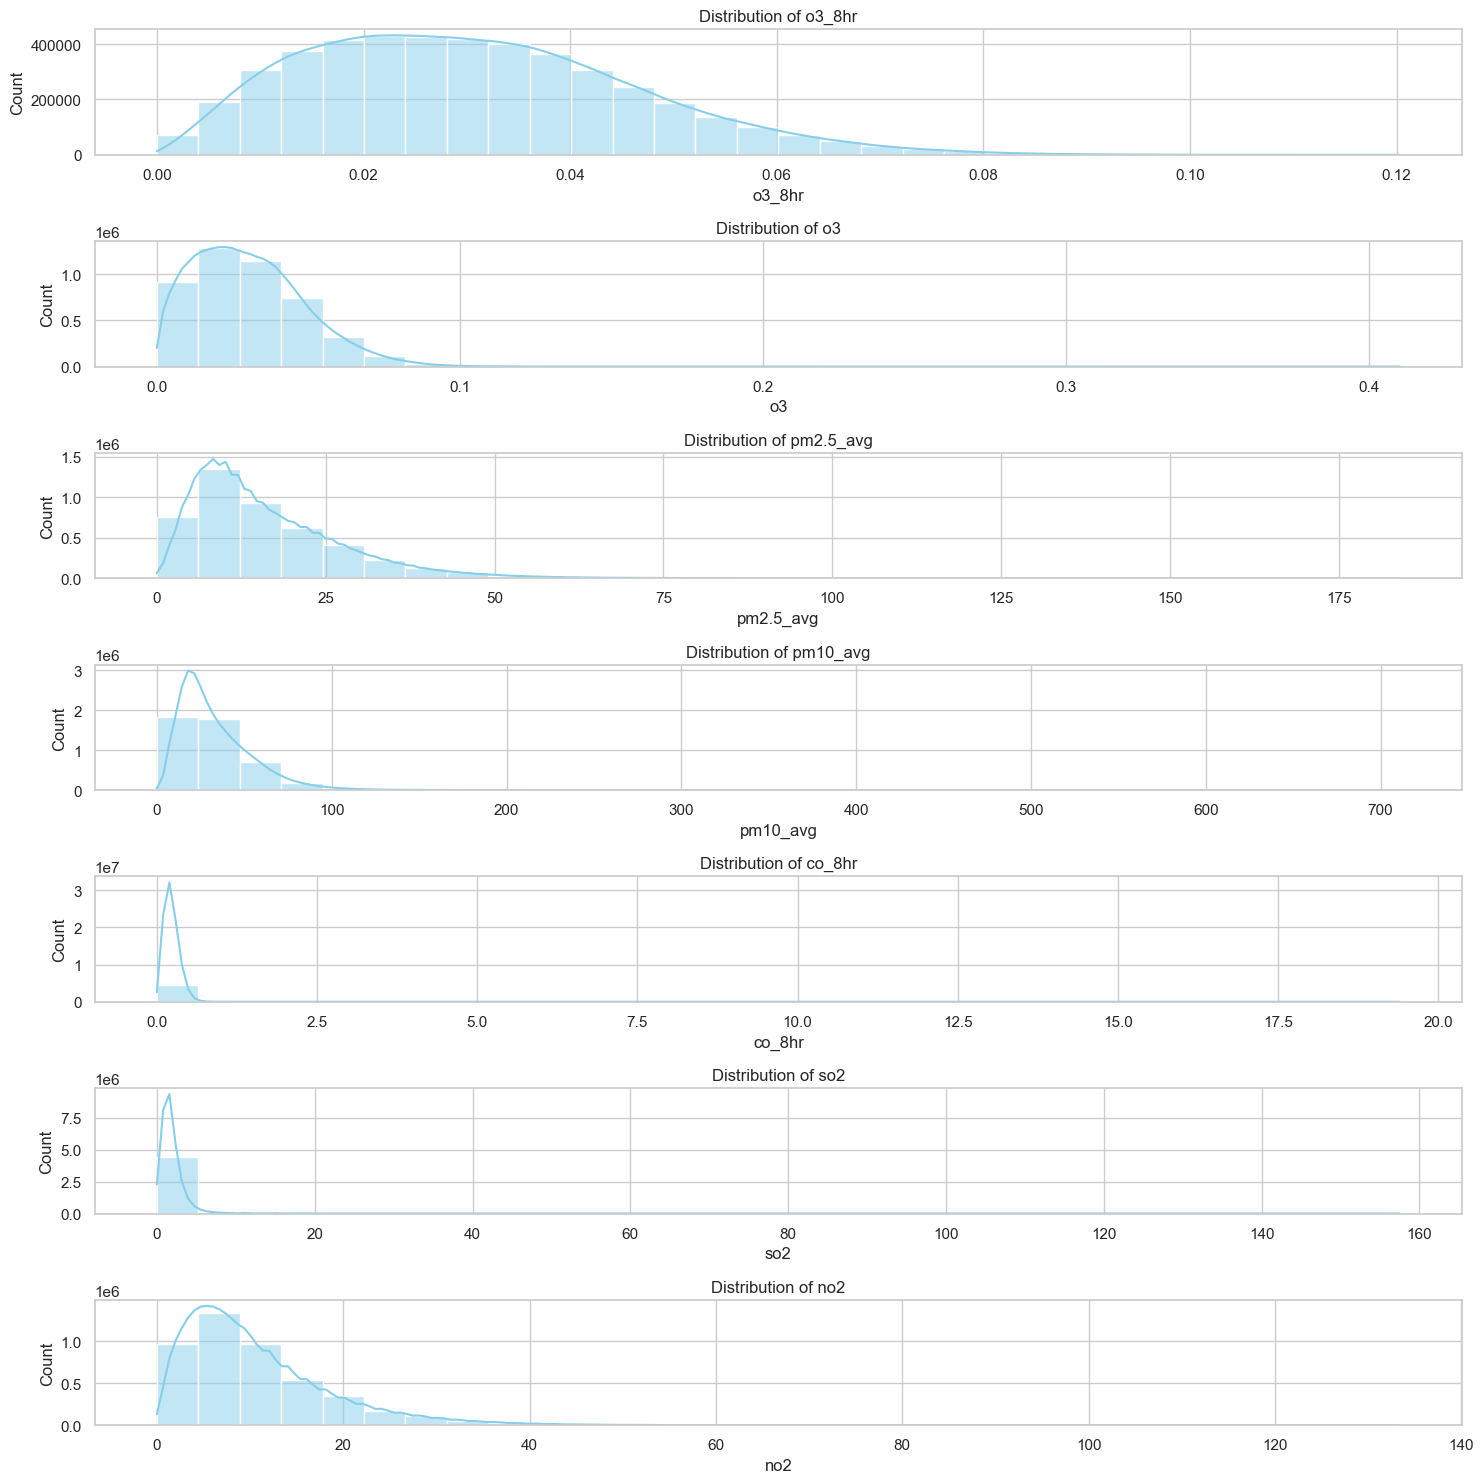

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# 設定 Seaborn 風格
sns.set(style="whitegrid")

# 假設 final_preprocess_data_filtered 是您過濾後的 DataFrame

# 繪製每個特徵的分佈
features_to_plot = final_preprocess_data_filtered.columns  # 所有的特徵名稱

# 設定繪圖大小
plt.figure(figsize=(15, 15))

# 遍歷每個特徵並繪製分佈圖
for i, feature in enumerate(features_to_plot):
    plt.subplot(7, 1, i+1)  # 設定圖表位置，這裡假設有 15 個特徵
    sns.histplot(final_preprocess_data_filtered[feature], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()

# 顯示所有圖表
plt.show()


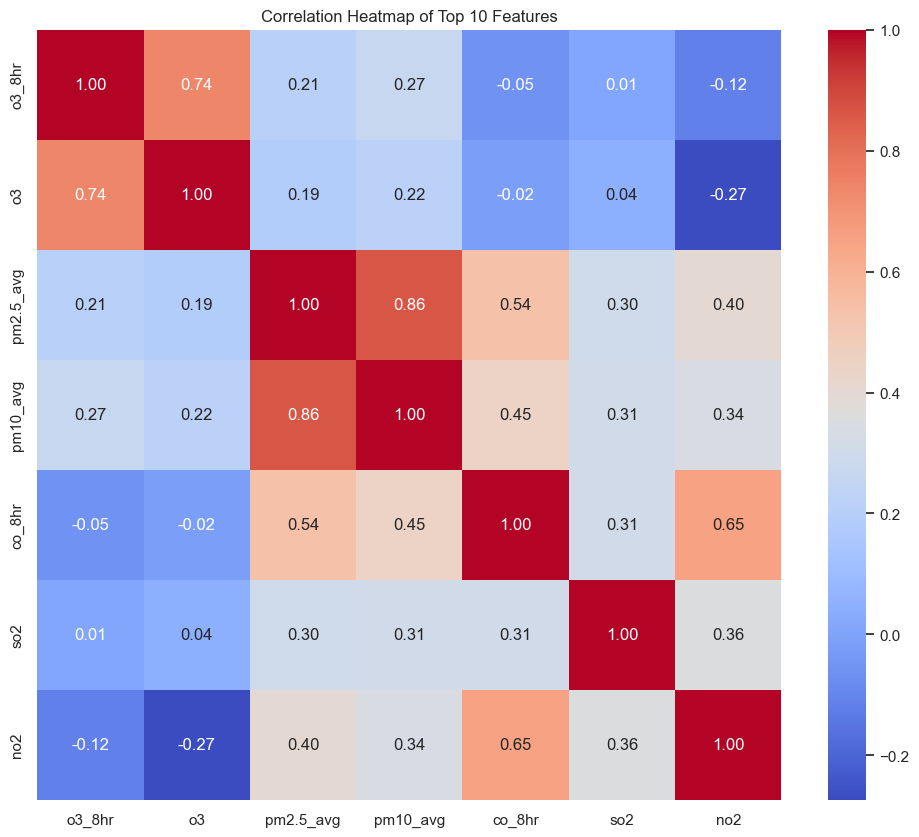

In [46]:
# 特徵之間的相關性（熱力圖）
plt.figure(figsize=(12, 10))
corr_matrix = final_preprocess_data_filtered[features_to_plot].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Top 10 Features")
plt.show()

In [47]:
final_preprocess_data_filtered.describe()

,o3_8hr,o3,pm2.5_avg,pm10_avg,co_8hr,so2,no2
count,4.567550e+06,4.567550e+06,4.567550e+06,4.567550e+06,4.567550e+06,4.567550e+06,4.567550e+06
mean,3.048386e-02,3.038505e-02,1.628858e+01,3.290938e+01,2.922822e-01,1.854056e+00,1.069362e+01
std,1.578174e-02,1.822537e-02,1.119337e+01,2.091282e+01,1.791575e-01,1.558714e+00,7.916243e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.800000e-02,1.600000e-02,8.000000e+00,1.800000e+01,2.000000e-01,1.000000e+00,5.000000e+00
50%,2.900000e-02,2.820000e-02,1.320000e+01,2.800000e+01,3.000000e-01,1.600000e+00,8.700000e+00
75%,4.100000e-02,4.200000e-02,2.200000e+01,4.400000e+01,4.000000e-01,2.400000e+00,1.420000e+01
max,1.203000e-01,4.100000e-01,1.840000e+02,7.110000e+02,1.940000e+01,1.575000e+02,1.334000e+02


In [ ]:
import pandas as pd
from tqdm import tqdm

# 設定各指標的最低閾值
thresholds = {
    'o3_8hr': 0.071,
    'o3': 0.125,
    'pm2.5': 35.5,
    'pm10': 101,
    'co': 9.5,
    'so2': 76,
    'no2': 101
}

# 創建一個新的變數來存儲處理結果
filtered_data = final_preprocess_data_filtered.copy()
# 用來儲存每行超過閾值的指標
exceeded_values = []

# 逐行遍歷 DataFrame 並顯示進度條
for index, row in tqdm(filtered_data.iterrows(), total=filtered_data.shape[0], desc="Processing Rows"):
    exceeded = []  # 記錄該行超過閾值的指標
    for column, threshold in thresholds.items():
        if column in row and pd.notna(row[column]) and row[column] > threshold:
            exceeded.append(column)  # 若該指標超過閾值且有數值，加入到 exceeded 列表中
    exceeded_values.append(exceeded)  # 將結果加入總列表

# 將 exceeded_values 新增到新 DataFrame 的 'Exceeded_Indicators' 欄位
filtered_data['Exceeded_Indicators'] = exceeded_values

# 將空的 Exceeded_Indicators 替換為 NaN
filtered_data['Exceeded_Indicators'] = filtered_data['Exceeded_Indicators'].apply(lambda x: None if len(x) == 0 else x)

# 刪除 Exceeded_Indicators 是 NaN 的行
filtered_data = filtered_data[filtered_data['Exceeded_Indicators'].notna()]

# 只保留 'Exceeded_Indicators' 欄位
exceeded_indicators_data = filtered_data[['Exceeded_Indicators']]

# 計算每一種汙染物超標的總數量
pollutants = list(thresholds.keys())  # 所有汙染物指標
exceeded_count = {pollutant: 0 for pollutant in pollutants}  # 初始化計數字典

# 逐行遍歷 Exceeded_Indicators 欄位，統計每種汙染物超標的次數
for exceeded in exceeded_indicators_data['Exceeded_Indicators']:
    if exceeded is not None:
        for pollutant in exceeded:
            exceeded_count[pollutant] += 1

# 輸出每種汙染物超標的總數量
print("汙染物超標的總數量:")
for pollutant, count in exceeded_count.items():
    print(f"{pollutant}: {count}")
    
    

# 檢視結果
print(exceeded_indicators_data.head())
print(exceeded_indicators_data.shape)


Processing Rows: 100%|██████████| 4567550/4567550 [05:03<00:00, 15065.65it/s]


汙染物超標的總數量:
o3_8hr: 51244
o3: 122
pm2.5_avg: 296317
pm10_avg: 40459
co_8hr: 2
so2: 43
no2: 4
        Exceeded_Indicators
5888            [pm2.5_avg]
5988  [pm2.5_avg, pm10_avg]
6053  [pm2.5_avg, pm10_avg]
6110  [pm2.5_avg, pm10_avg]
6205  [pm2.5_avg, pm10_avg]
(347891, 1)


In [53]:
# 重設索引，移除舊的索引
exceeded_indicators_data = exceeded_indicators_data.reset_index(drop=True)

# 檢視重設索引後的 DataFrame
print(exceeded_indicators_data)


          Exceeded_Indicators
0                 [pm2.5_avg]
1       [pm2.5_avg, pm10_avg]
2       [pm2.5_avg, pm10_avg]
3       [pm2.5_avg, pm10_avg]
4       [pm2.5_avg, pm10_avg]
...                       ...
347886               [o3_8hr]
347887               [o3_8hr]
347888               [o3_8hr]
347889               [o3_8hr]
347890               [o3_8hr]

[347891 rows x 1 columns]


In [54]:
# 指定輸出檔案路徑
output_file_path = './exceeded_indicators_data.csv'

# 將 DataFrame 儲存為 CSV
exceeded_indicators_data.to_csv(output_file_path, index=False)

print(f"已成功將 exceeded_indicators_data 儲存至 {output_file_path}")


已成功將 exceeded_indicators_data 儲存至 ./exceeded_indicators_data.csv


### Visualization

In [55]:
import pandas as pd

# 讀取 CSV 檔案
file_path = './exceeded_indicators_data.csv'
exceeded_indicators_data = pd.read_csv(file_path)

# 顯示讀取後的資料
print(exceeded_indicators_data.head())


         Exceeded_Indicators
0              ['pm2.5_avg']
1  ['pm2.5_avg', 'pm10_avg']
2  ['pm2.5_avg', 'pm10_avg']
3  ['pm2.5_avg', 'pm10_avg']
4  ['pm2.5_avg', 'pm10_avg']


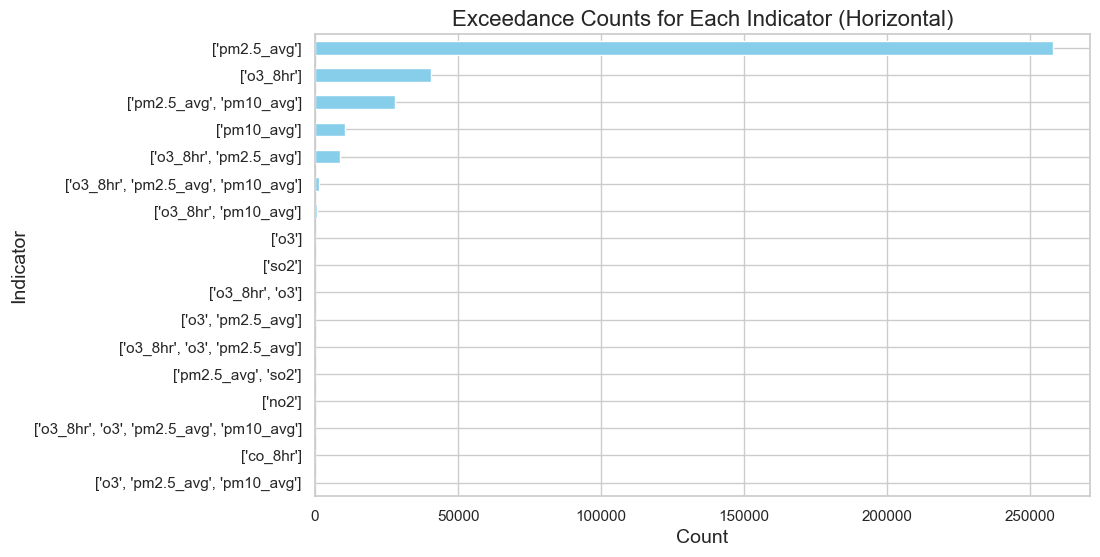

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# 假設 exceeded_indicators_data 是已經有 "Exceeded_Indicators" 的 DataFrame

# 展開 Exceeded_Indicators 列表中的每個元素
expanded_indicators = exceeded_indicators_data['Exceeded_Indicators'].explode()

# 計算每個指標的出現次數
exceeded_counts = expanded_indicators.value_counts()

exceeded_counts= exceeded_counts.sort_values(ascending=True)

# Plotting a horizontal bar chart for the exceedance counts
plt.figure(figsize=(10, 6))
exceeded_counts.plot(kind='barh', color='skyblue')
plt.title('Exceedance Counts for Each Indicator (Horizontal)', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Indicator', fontsize=14)
plt.show()
